<a href="https://colab.research.google.com/github/emilziyaev/veselovskiypaper2015/blob/main/Veselovskiy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Зависимость для треугольных импульсов


In [ ]:
from scipy.optimize import root
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

In [ ]:
import math as mt

In [ ]:
mt.pi

3.141592653589793

In [ ]:
def f(x):
    return U_c*np.sin(x) + U_t/2*np.cos(12*x) - U_t/2


U_t = float(input('U_t = '))
U_c = float(input('U_c = '))

a = mt.pi/12

solutions = []
K = 100
A = [0] * K
b = 0.0100000000001

U_t = 1
U_c = 1.5


In [ ]:
for k in range(1, K):
    A[k] = A[k-1] + b

for j in A:
    y = root(f, j)
    if y.success and (round(y.x[0], 8) not in solutions):
        solutions.append(round(y.x[0], 8))

solutions = sorted(solutions)
i = 0
while solutions[i] < 0:
    del solutions[i]

i = len(solutions)-1

In [ ]:
while solutions[i] > pi or solutions[i] > pi/2:
    del solutions[i]
    i -= 1

if U_c/U_t == 1:
    solutions += [1.272, 1.338]

L = len(solutions)
solutions += [0] * (12 - len(solutions))

k = 1
for i in range(L, len(solutions)):
    solutions[i] = pi - solutions[i-k]
    k += 2

solutions += [pi]

print(solutions, '\n',
      'массив координат по оси ОХ пересечений 2х графиков при модуляции')

[0.0, 0.04257194, 0.38266065, 2.758932003589793, 3.099020713589793, 3.141592653589793, 3.141592653589793, 3.141592653589793, 3.141592653589793, 0.0, 0.0, 0.0, 3.141592653589793] 
 массив координат по оси ОХ пересечений 2х графиков при модуляции


0.43094661 U_0
 0.18105120721430246 U Среднее +
 0.24989540278569755 U Среднее -


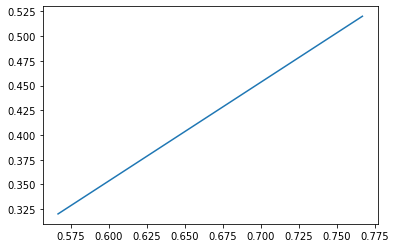

In [ ]:
plt.ticklabel_format(useOffset=False)

U_1 = [0]*(len(solutions)-2)
for i in range(0, len(solutions)-2, 2):
    U_1[i] = solutions[i+1] - solutions[i]

U_0 = solutions[2]

U_avg_pl = 0
for i in range(len(U_1)):
    U_avg_pl += U_0 * U_1[i] / pi

U_2 = [0]*(len(solutions)-2)
for i in range(1, len(solutions)-1, 2):
    U_2[i-1] = solutions[i+1] - solutions[i]

U_avg_mn = 0
for i in range(len(U_2)):
    U_avg_mn += U_0 * U_2[i] / pi

print(U_0, 'U_0\n', U_avg_pl, 'U Среднее +\n', U_avg_mn, 'U Среднее -')

y = [U_avg_pl/U_0-0.1, U_avg_pl/U_0+0.1]
x = [U_c/U_t-0.1, U_c/U_t+0.1]
plt.plot(x, y)
plt.show()

U_t = 1.5
U_c = 1
2.8647889756541165
[0.0, 0.52359878, 0.9899503, 1.08722191, 1.74032517, 1.75098037, 2.34417159, 2.61799388, 2.88209528, 3.66519143, 3.40109003, 4.53220493] 
 массив координат по оси ОХ пересечений 2х графиков при модуляции
0.52359878 U_0
 0.3013765559096378 U Среднее +
 0.22222222409036224 U Среднее -


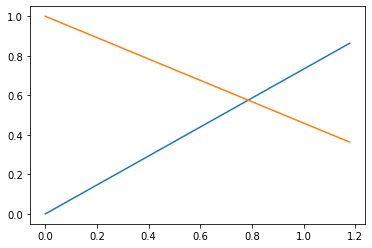

In [ ]:
from scipy.optimize import root
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt


N = 12
B = [0]*N

for i in range(1, N):
    if B[i-1] <= 0:
        B[i] = abs(B[i-1])+2
    else:
        B[i] = -abs(B[i-1])

U_t = float(input('U_t = '))
U_c = float(input('U_c = '))
x_0 = pi/6

Const_K = U_t/x_0
print(Const_K)

K = [0] * N
for i in range(N):
    if i % 2 == 0:
        K[i] = Const_K
    else:
        K[i] = -Const_K

range_x = np.linspace(-7, 7)
#print(K, '\n', B)

def f(x):
    return k*x + m - np.sin(x)

def sin_x():
    for i in range_x:
        solutions = []
        b = i
        c = abs(int(round(i)))
        for j in range(-c, c+1):
            y = root(f, j)
            if y.success and (round(y.x[0], 8) not in solutions) and len(solutions) == 0:
                solutions.append(round(y.x[0], 8))

    return solutions[0]


A = []
for i in range(N):
    k = K[i]
    m = B[i]
    A.append(sin_x())

print(A, '\n',
      'массив координат по оси ОХ пересечений 2х графиков при модуляции')

U = [0]*N
U_0 = A[1]
for i in range(1, len(A)):
    U[i] = abs(A[i] - A[i-1])

U_avg_pl = U_0 - U_0*U_c*2/(pi*U_t)
U_avg_mn = U_0*U_c*2/(pi*U_t)

print(U_0, 'U_0\n', U_avg_pl, 'U Среднее +\n', U_avg_mn, 'U Среднее -')

k_1 = U_avg_pl/U_0
k_2 = U_avg_mn/U_0

y1 = [0, k_1/(k_1+k_2), k_1*1.5]
y2 = [1, k_1/(k_1+k_2), 1-k_2*1.5]

x = [0, 1/(k_1 + k_2)*pi/4, 1.5*pi/4]
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

U_t = 1.5
U_c = 1
[5.729577951308232, -5.729577951308232, 5.729577951308232, -5.729577951308232, 5.729577951308232, -5.729577951308232, 5.729577951308232, -5.729577951308232, 5.729577951308232, -5.729577951308232, 5.729577951308232, -5.729577951308232] 
 [0, 3.0, -3.0, 6.0, -6.0, 9.0, -9.0, 12.0, -12.0, 15.0, -15.0, 18.0]
[0.0, 0.44799778, 0.62583577, 0.90946092, 1.21052572, 1.3988375, 1.74275515, 1.93106694, 2.23213173, 2.51575688, 2.69359487, 3.14159265] 
 массив координат по оси ОХ пересечений 2х графиков при модуляции
0.44799778 U_0
 0.25786161685014547 U Среднее +
 0.19013616314985454 U Среднее -


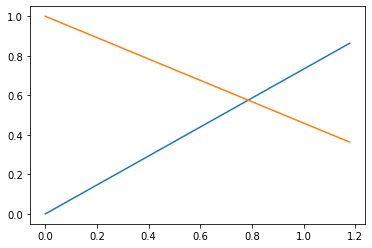

In [ ]:
from scipy.optimize import root
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

U_t = float(input('U_t = '))
U_c = float(input('U_c = '))
x_0 = pi/6

N = 12 #количество точек x по оси абсцисс 
B = [0]*N
m = 2

for i in range(1, N):
    if i % 2 != 0:
        B[i] = m*U_t
    else:
        B[i] = -m*U_t
        m += 2

Const_K = 12*U_t/pi

#print(Const_K)

K = [0] * N
for i in range(N):
    if i % 2 == 0:
        K[i] = Const_K
    else:
        K[i] = -Const_K

range_x = np.linspace(-7, 7)
print(K, '\n', B)

def f(x):
    return k*x + m - np.sin(x)

def sin_x():
    for i in range_x:
        solutions = []
        b = i
        c = abs(int(round(i)))
        for j in range(-c, c+1):
            y = root(f, j)
            if y.success and (round(y.x[0], 8) not in solutions) and len(solutions) == 0:
                solutions.append(round(y.x[0], 8))

    return solutions[0]


A = []
for i in range(N):
    k = K[i]
    m = B[i]
    A.append(sin_x())

print(A, '\n',
      'массив координат по оси ОХ пересечений 2х графиков при модуляции')

U = [0]*N
U_0 = A[1]
for i in range(1, len(A)):
    U[i] = abs(A[i] - A[i-1])

U_avg_pl = U_0 - U_0*U_c*2/(pi*U_t)
U_avg_mn = U_0*U_c*2/(pi*U_t)

print(U_0, 'U_0\n', U_avg_pl, 'U Среднее +\n', U_avg_mn, 'U Среднее -')

k_1 = U_avg_pl/U_0
k_2 = U_avg_mn/U_0

y1 = [0, k_1/(k_1+k_2), k_1*1.5]
y2 = [1, k_1/(k_1+k_2), 1-k_2*1.5]

x = [0, 1/(k_1 + k_2)*pi/4, 1.5*pi/4]
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

Зависимость для трапецивидных импульсов



H_trap = 1.5
l_trap (<pi/6) = 0.1
U_c = 1
[6.334475836028273, -6.334475836028273, 6.334475836028273, -6.334475836028273, 6.334475836028273, -6.334475836028273, 6.334475836028273, -6.334475836028273, 6.334475836028273, -6.334475836028273, 6.334475836028273, -6.334475836028273] 
 [0, 3.316723791801414, -3.316723791801414, 6.633447583602828, -6.633447583602828, 9.950171375404242, -9.950171375404242, 13.266895167205655, -13.266895167205655, 16.58361895900707, -16.58361895900707, 19.900342750808484]
[0.0, 0.45431908, 0.61463384, 0.92145945, 1.19398854, 1.41484588, 1.72674678, 1.94760412, 2.2201332, 2.52695881, 2.68727358, 3.14159265] 
 A массив координат по оси ОХ пересечений 2х графиков при модуляции
0.45431908 U_0
 0.2799129325801932 U Среднее +
 0.1744061474198068 U Среднее -


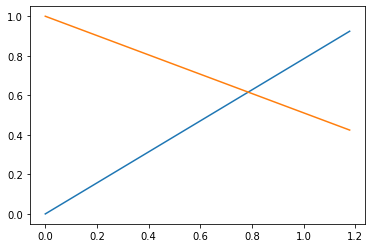

In [ ]:
from scipy.optimize import root
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt


H_trap = float(input('H_trap = ')) #высота трапеции
l_trap = float(input('l_trap (<pi/6) = ')) #длина короткого основания 
U_c = float(input('U_c = '))

x_0 = pi/6


base_h = pi/12 #половина основания трапеции
diff = abs(pi/12-l_trap/2)
zn = 1 - (l_trap/x_0/2)
U_t = H_trap/zn


N = 12
B = [0]*N
m = 2
#y = Kx + B
#нахождение B
for i in range(1, N):
    if i % 2 != 0:
        B[i] = m*U_t #если B четный, то B > 0
    else:
        B[i] = -m*U_t #иначе B < 0
        m += 2

Const_K = 12*U_t/pi

#print(Const_K)

K = [0] * N
for i in range(N):
    if i % 2 == 0:
        K[i] = Const_K  #если K четный, то K > 0
    else:
        K[i] = -Const_K #иначе K < 0

range_x = np.linspace(-7, 7)
print(K, '\n', B)

def f(x):
    return k*x + m - np.sin(x)

def sin_x():
    #функция решения уравнения методом 
    
    #перебор всех значений на отрезке [-7, 7]  (заполнен рациональными числами)
    for i in range_x:
        solutions = []
        c = abs(int(round(i)))

        #
        for j in range(-c, c+1):

            y = root(f, j)
            if y.success and (round(y.x[0], 8) not in solutions) and len(solutions) == 0:
                solutions.append(round(y.x[0], 8))

    return solutions[0]


A = []
for i in range(N):
    k = K[i]
    m = B[i]
    A.append(sin_x()) #нахождение абсцисс точек пересечения

print(A, '\n',
      'A массив координат по оси ОХ пересечений 2х графиков при модуляции')

U = [0]*N 
U_0 = A[1]
for i in range(1, len(A)):
    U[i] = abs(A[i] - A[i-1]) #нахождение отрезков между точками пересечений

U_avg_pl = U_0 - U_0*U_c*2/(pi*U_t)
U_avg_mn = U_0*U_c*2/(pi*U_t)

print(U_0, 'U_0\n', U_avg_pl, 'U Среднее +\n', U_avg_mn, 'U Среднее -')

k_1 = U_avg_pl/U_0
k_2 = U_avg_mn/U_0

y1 = [0, k_1/(k_1+k_2), k_1*1.5]
y2 = [1, k_1/(k_1+k_2), 1-k_2*1.5]
# y1 = [0, k_1, k_1*1.5]
# y2 = [1, k_2, 1-k_2*1.5]

x = [0, 1/(k_1 + k_2)*pi/4, 1.5*pi/4]

plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

График по нескольким точкам


H_trap = 1.5
l_trap (<pi/6) = 0.1
U_c = 1
[6.334475836028273, -6.334475836028273, 6.334475836028273, -6.334475836028273, 6.334475836028273, -6.334475836028273, 6.334475836028273, -6.334475836028273, 6.334475836028273, -6.334475836028273, 6.334475836028273, -6.334475836028273] 
 [0, 3.316723791801414, -3.316723791801414, 6.633447583602828, -6.633447583602828, 9.950171375404242, -9.950171375404242, 13.266895167205655, -13.266895167205655, 16.58361895900707, -16.58361895900707, 19.900342750808484]
[0.0, 0.45431908, 0.61463384, 0.92145945, 1.19398854, 1.41484588, 1.72674678, 1.94760412, 2.2201332, 2.52695881, 2.68727358, 3.14159265] 
 A массив координат по оси ОХ пересечений 2х графиков при модуляции
0.45431908 U_0
 0.2799129325801932 U Среднее +
 0.1744061474198068 U Среднее -


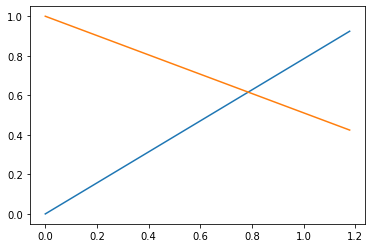

In [ ]:
from scipy.optimize import root
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt


H_trap = float(input('H_trap = ')) #высота трапеции
l_trap = float(input('l_trap (<pi/6) = ')) #длина короткого основания 
U_c = float(input('U_c = '))

x_0 = pi/6


base_h = pi/12 #половина основания трапеции
diff = abs(pi/12-l_trap/2)
zn = 1 - (l_trap/x_0/2)
U_t = H_trap/zn


N = 12
B = [0]*N
m = 2
#y = Kx + B
#нахождение B
for i in range(1, N):
    if i % 2 != 0:
        B[i] = m*U_t #если B четный, то B > 0
    else:
        B[i] = -m*U_t #иначе B < 0
        m += 2

Const_K = 12*U_t/pi

#print(Const_K)

K = [0] * N
for i in range(N):
    if i % 2 == 0:
        K[i] = Const_K  #если K четный, то K > 0
    else:
        K[i] = -Const_K #иначе K < 0

range_x = np.linspace(-7, 7)
print(K, '\n', B)

def f(x):
    return k*x + m - np.sin(x)

def sin_x():
    #функция решения уравнения методом 
    
    #перебор всех значений на отрезке [-7, 7]  (заполнен рациональными числами)
    for i in range_x:
        solutions = []
        c = abs(int(round(i)))

        #
        for j in range(-c, c+1):

            y = root(f, j)
            if y.success and (round(y.x[0], 8) not in solutions) and len(solutions) == 0:
                solutions.append(round(y.x[0], 8))

    return solutions[0]


A = []
for i in range(N):
    k = K[i]
    m = B[i]
    A.append(sin_x()) #нахождение абсцисс точек пересечения

print(A, '\n',
      'A массив координат по оси ОХ пересечений 2х графиков при модуляции')

U = [0]*N 
U_0 = A[1]
for i in range(1, len(A)):
    U[i] = abs(A[i] - A[i-1]) #нахождение отрезков между точками пересечений

U_avg_pl = U_0 - U_0*U_c*2/(pi*U_t)
U_avg_mn = U_0*U_c*2/(pi*U_t)

print(U_0, 'U_0\n', U_avg_pl, 'U Среднее +\n', U_avg_mn, 'U Среднее -')

k_1 = U_avg_pl/U_0
k_2 = U_avg_mn/U_0

y1 = [0, k_1/(k_1+k_2), k_1*1.5]
y2 = [1, k_1/(k_1+k_2), 1-k_2*1.5]

x = [0, 1/(k_1 + k_2)*pi/4, 1.5*pi/4]
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

In [ ]:
U = [0]*(N-1)

for i in range(len(A)-1):
    U[i] = abs(A[i] - A[i+1]) #нахождение отрезков между точками пересечений

In [ ]:
U_avg_plus=0
U_avg_minus=0
sum_plus=0
sum_minus=0

for i in range(len(U)):
  if i%2==0:
    sum_plus = sum_plus + (U[i]*U_0)
  else:
    sum_minus = sum_minus + (U[i]*U_0)

U_avg_plus = sum_plus/6
U_avg_minus = sum_minus/5

In [ ]:
U_avg_plus, U_avg_minus

(0.19555094964074402, 0.29526352317722104)